## Sieć neuronowa

$[x_1, x_2] = [a_1^{[1]}, a_2^{[1]}] \mapsto [a_1^{[2]}, a_2^{[2]}] \mapsto [a_1^{[3]}, a_2^{[3]}, a_3^{[3]}] \mapsto [a_1^{[4]}, a_2^{[4]}] = [y_1, y_2] =: F_p(x)$

$a^{[k+1]} = \sigma(W^{[k+1]}a^{[k]} + b^{[k+1]}), k = 1, 2, 3$

Dane trenujące:

$X_0, ..., X_{M-1}$, $M = 10$, $X_k = [x_1^{(k)}, x_2^{(k)}]$

$Y_0, ..., Y_{M-1}$, $Y_k \in \{[1, 0], [0, 1]\}$

Funkcja straty:

$\sum_{i=0}^{M-1} ||F_p(X_i) - Y_i||_2^2 \to \min_{p \in \R^{23}}!$

$W_2 \in \R^{2\times 2}, W_3 \in \R^{3\times 2}, W_4 \in \R^{2\times 3}$

$b_2 \in \R^2, b_3 \in \R^3, b_4 \in \R^2$

In [72]:
from scipy.optimize import least_squares
import numpy as np

In [73]:
x1 = np.array([0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7])
x2 = np.array([0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6])

y1 = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
y2 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

X = np.vstack((x1, x2)).T
Y = np.vstack((y1, y2)).T

In [74]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [75]:
def F(x, p):
    assert x.shape == (2,)
    assert p.shape == (23,)
    
    W2, W3, W4, b2, b3, b4 = p[:4], p[4:10], p[10:16], p[16:18], p[18:21], p[21:23]
    W2 = W2.reshape((2, 2))
    W3 = W3.reshape((3, 2))
    W4 = W4.reshape((2, 3))
    
    assert W2.shape == (2, 2)
    assert W3.shape == (3, 2)
    assert W4.shape == (2, 3)
    assert b2.shape == (2,)
    assert b3.shape == (3,)
    assert b4.shape == (2,)
    
    a1 = x
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    a4 = sigmoid(W4 @ a3 + b4)
    y = a4
    
    assert y.shape == (2,)
    
    return y

In [76]:
def f(p, X, Y):
    assert p.shape == (23,)
    
    res = np.array([np.linalg.norm(F(x, p) - y) for x, y in zip(X, Y)])
    return res

f(np.random.randn(23), X, Y)

array([0.82154777, 0.82061228, 0.82009719, 0.81919368, 0.82143065,
       0.71048812, 0.71501458, 0.70921239, 0.71126654, 0.71568642])

In [77]:
p = least_squares(f, np.random.randn(23), args=(X, Y)).x
p

array([-8.64424519e+00,  1.07936054e+01,  1.14361759e+01,  1.22630856e+01,
        2.44484260e+00,  2.35735664e+00, -1.51542492e+01,  1.58219801e+01,
        2.62836543e-03,  3.71542090e-01,  5.10547806e+00, -2.28463112e+01,
        1.56353436e+00, -5.28720688e+00,  2.27819210e+01,  6.95243961e-01,
       -2.65250147e+00, -8.53340269e+00,  3.34732375e+00, -6.40745890e+00,
       -5.55048205e-01,  5.65556173e+00, -6.30381216e+00])

In [81]:
np.linalg.norm(f(p, X, Y))

8.798420200180736e-05

In [79]:
F(X[0,:], p)

array([9.99986013e-01, 1.39781050e-05])

In [145]:
# X_test = np.random.randn(10000, 2)
# Y_test_result = np.array([F(x, p) for x in X_test])
# Y_test_classification = np.array([y[0] > y[1] for y in Y_test_result])

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

Y_test_result = np.array([F(np.array([x1, x2]), p) for x1, x2 in zip(X1.flatten(), X2.flatten())])
Y_test_classification = np.array([y[0] > y[1] for y in Y_test_result])

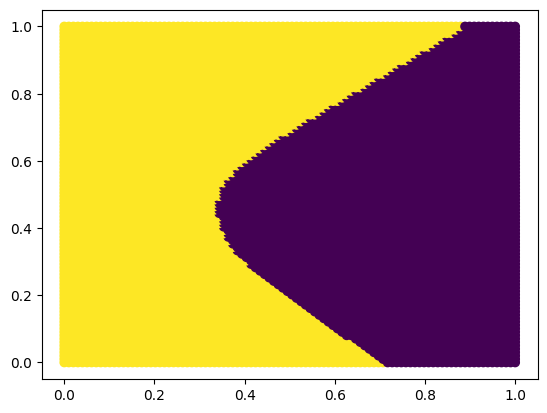

In [149]:
import matplotlib.pyplot as plt

# plt.scatter(X_test[:,0], X_test[:,1], c=Y_test_classification)
plt.scatter(X1, X2, c=Y_test_classification)